<a href="https://colab.research.google.com/github/NamrataCSalvi/Big-Sales-Analysis/blob/main/Big_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIG SALES PREDICTION USING RANDOM FOREST REGRESSOR


## Get understanding about Dataset

There are 12 variables in dataset

1.Item_Identifier

2.Item_Weight

3.Item_Fat_Content

4.tem_Visibility

5.Item_Type

6.Item_MRP

7.Outlet_Identifier

8.Outlet_Establishment_Year

9.Outlet_Size

10.Outlet_Location_Type

11.Outlet_Type

12.Item_Outlet_Sales




## Import Library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np


## Import Data

In [ ]:
sales = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv")

## Describe Data

In [ ]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Data visualization

In [ ]:
sales.shape

(14204, 12)

## Define Target Variable (y) and Feature Variables (X)

In [ ]:
y=sales['Item_Outlet_Sales']

In [ ]:
y.shape

(14204,)

In [ ]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [ ]:
X=sales[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

In [ ]:
X.shape

(14204, 11)

In [ ]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
14199,FDG47,12.8,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1
14200,FDG47,12.8,Low Fat,0.070013,Starchy Foods,262.8252,OUT017,2007,Medium,Tier 2,Supermarket Type1
14201,FDG47,12.8,Low Fat,0.069561,Starchy Foods,263.0252,OUT013,1987,High,Tier 3,Supermarket Type1
14202,FDG47,NaN,Low Fat,0.069282,Starchy Foods,263.5252,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12783, 11), (1421, 11), (12783,), (1421,))

## Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor(random_state=2529)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming X_train is a pandas DataFrame, identify columns with string values
object_cols = X_train.select_dtypes(include=['object']).columns

# Apply label encoding to each object column
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    # If X_test exists, apply the same transformation using the fitted encoder
    if 'X_test' in globals():
        X_test[col] = label_encoder.transform(X_test[col])

# Impute missing values using SimpleImputer (replace NaN with mean for numerical columns)
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_train = imputer.fit_transform(X_train)
if 'X_test' in globals():
    X_test = imputer.transform(X_test)

# Now you can fit the model
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=2529)

## Prediction

In [ ]:
y_pred=rfr.predict(X_test)

In [ ]:
y_pred.shape

(1421,)

In [ ]:
y_pred

array([1232.67333374, 1019.45863045, 1935.23538881, ..., 2308.90948119,
       3289.44728335,  632.43688302])

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

1581987.785083699

In [ ]:
r2_score(y_test,y_pred)

0.5882320677084534

## Prediction

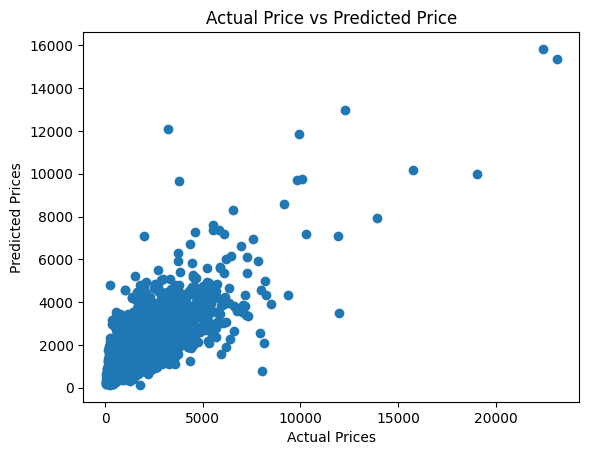

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

## Explaination
Machine Learning Model: Random Forest Regressor

 Random Forest Regressor is used for this project, which is a powerful ensemble learning method that can handle both continuous and categorical variables effectively. It works by creating multiple decision trees during training and outputting the mean prediction of the individual trees, reducing overfitting and improving generalization.

Why Random Forest Regressor?

Handles missing values: It can handle missing data points effectively.

Reduces overfitting: By averaging multiple decision trees, it reduces the risk of overfitting to the training data.

Feature importance: Provides insight into feature importance, helping to understand which variables are most influential in predicting sales.

Versatility: Works well with both numerical and categorical data.

Summary

The project is about  predicting Item_Outlet_Sales using a Random Forest Regressor, leveraging features such as item characteristics, outlet properties, and item visibility. This approach allows us to build a robust model that captures the complexity of sales data, offering insights into the key factors driving sales in different outlets.